
# Rosario Water System
-----------------------------------
## Lower Vusario BPS  Pump Sizing
ENGINEER: *Ryan Haseman - 8-29-2019*  
WO #: *00118275*  
ENG FILE #: *3681*

**Purpose:**  
The existing transfer station is inadequate and improperly installed (subjects pump to undue wear and tear). A new transfer station will be designed to increase reliability and performance.

In [1]:
import matplotlib.pyplot as plt
from Water import Pipe, Pump, tools

In [2]:
# maximum daily demand
MDD = 425  # gpd/ERU
ADD = 200  # gpd/ERU
N = 14

Q_MDD = (MDD/1440) * N
Q_ADD = (ADD/1440) * N

flows = 'Target MDD flow = {:.1f} gpm    Target ADD flow = {:.1f} gpm'.format(Q_MDD, Q_ADD)
Q = 28 # GPM
print(flows)
print('Using', Q, 'gpm to fill tank in 18 hours.')

Target MDD flow = 4.1 gpm    Target ADD flow = 1.9 gpm
Using 28 gpm to fill tank in 18 hours.


In [3]:
# elevations
station_elevation = 1079   # ft
storage_elevation = 1341   # ft
OS_water_level = 13        # ft

suction_static_low = 1     # ft
suction_static_high = 13   # ft

print('Suction Side Static Low Pressure = {:.2f} ft'.format(suction_static_low))
print('Suction Side Static High Pressure = {:.2f} ft'.format(suction_static_high))

print('Discharge Side Static Pressure = {:.2f} psig'.format(tools.ft2psi(storage_elevation +\
                                                                         OS_water_level -\
                                                                         station_elevation)))

print('Elevation change from BPS to top of Operational Storage at the Upper Vusario Tank = {} ft'.format(storage_elevation +\
                                                                                                         OS_water_level -\
                                                                                                         station_elevation))

Suction Side Static Low Pressure = 1.00 ft
Suction Side Static High Pressure = 13.00 ft
Discharge Side Static Pressure = 119.17 psig
Elevation change from BPS to top of Operational Storage at the Upper Vusario Tank = 275 ft



<div></div>

### Losses

Major losses are calculated using the Hazen Williams equation 
$$h_{l}=\bigg{(}\frac{Q}{C}\bigg{)}^{1.85}\bigg{(}\frac{10.45 L}{d^{4.87}}\bigg{)}$$  
Minor losses are cacluated using the Darcy-Weisbach Equation  
$$h_{l}=K_{l}\frac{V^{2}}{2g}$$

In [4]:
#### Pipe and Fitting Definitions ####
# suction side 
pipe_tnk2bps = Pipe(length=20, size = 4, kind='PVC')
pipe_tnk2bps.fitting('elbow_90', 'standard_flanged', 2)
pipe_tnk2bps.fitting('valve', 'gate', 1)

pipe_bps2pmp = Pipe(length=6, size=2, kind='STEEL', sch=40)
pipe_bps2pmp.fitting('elbow_90', 'standard_threaded', 2)
pipe_bps2pmp.fitting('tee_through', 'standard_threaded', 2)
pipe_bps2pmp.fitting('tee_branch', 'standard_threaded', 1)

# discharge side
pipe_pmp2dh = Pipe(length=1, size=1.5, kind='STEEL', sch=40)
pipe_pmp2dh.fitting('elbow_90', 'standard_threaded', 1)
pipe_pmp2dh.fitting('tee_through', 'standard_threaded', 1)
pipe_pmp2dh.fitting('tee_branch', 'standard_threaded', 1)
pipe_pmp2dh.fitting('valve', 'butterfly', 1)
pipe_pmp2dh.fitting('valve', 'tilt_disc_check', 1)

pipe_dischargeHeader = Pipe(length=4, size=2, kind='STEEL', sch=40)
pipe_dischargeHeader.fitting('elbow_90', 'standard_flanged', 1)
pipe_dischargeHeader.fitting('tee_through', 'standard_flanged', 2)
pipe_dischargeHeader.fitting('valve', 'butterfly', 1)

pipe_bps2strg = Pipe(length=2000, size=3, kind='PVC', sch=40)
pipe_bps2strg.fitting('valve', 'gate', 1)
pipe_bps2strg.fitting('tee_branch', 'standard_flanged', 2)

In [5]:
#### Calculating Major and Minor Losses
# suction side losses (H1) 
suction_losses = pipe_tnk2bps.get_losses(flow=Q) + pipe_bps2pmp.get_losses(flow=Q) 

# discharge side losses (H2)
discharge_losses = pipe_pmp2dh.get_losses(flow=Q) +\
                   pipe_dischargeHeader.get_losses(flow=Q) +\
                   pipe_bps2strg.get_losses(flow=Q)
                   

# print result
result = 'Suction Losses: {:.2f} ft,  Discharge Losses: {:.2f} ft'.format(suction_losses, discharge_losses)
print(result)

Suction Losses: 0.52 ft,  Discharge Losses: 5.95 ft


In [6]:
discharge_head = storage_elevation + OS_water_level + discharge_losses - station_elevation
suction_head_low = suction_static_low - suction_losses
suction_head_high = suction_static_high - suction_losses
TDH_low = discharge_head - suction_head_low
TDH_high = discharge_head - suction_head_high
result = '''
At supply storage low level Total Dynamic Head from pump discharge to Operational Storate Water Level = TDH = {:.2f} ft or {:.1f} psi
At supply storage high level Total Dynamic Head from pump discharge to Operational Storate Water Level = TDH = {:.2f} ft or {:.1f} psi
'''.format(TDH_low, tools.ft2psi(TDH_low), TDH_high, tools.ft2psi(TDH_high) )
print(result)


At supply storage low level Total Dynamic Head from pump discharge to Operational Storate Water Level = TDH = 280.47 ft or 121.5 psi
At supply storage high level Total Dynamic Head from pump discharge to Operational Storate Water Level = TDH = 268.47 ft or 116.3 psi



### Pumping Requirements

Horse Power Calculation:  
$$hp_{water}=(Q)(TDH)\bigg{(}\frac{1\ psi}{2.308\ ft}\bigg{)}\bigg{(}\frac{1\ hp}{1714 (psi\ gpm)}\bigg{)}$$  
$$hp_{break}=\frac{hp_{water}}{\eta_{pump}} \quad hp_{input}=\frac{hp_{break}}{\eta_{motor}}$$

$
\begin{align}
\text{where:}\quad \eta_{pump}=0.6 \quad \eta_{motor}=0.9
\end{align}
$





In [7]:
hp = tools.calc_hp(flow_rate=Q, head=TDH_low)
psi = tools.ft2psi(TDH_low)
reqs = 'FLOW = {:.2f} gpm    HEAD = {:.2f} ft or {:.2f} psi   Total HP = {:.2f} hp'.format(Q, TDH_low, psi, hp[2])
print(reqs)

FLOW = 28.00 gpm    HEAD = 280.47 ft or 121.54 psi   Total HP = 3.67 hp


### System Curve

In [8]:
from numpy import arange
sys_x = arange(0, Q+1)
sys_y_low = []
sys_y_high = []
for x in sys_x:
    s_loss = pipe_tnk2bps.get_losses(flow=x) + pipe_bps2pmp.get_losses(flow=x)


    d_loss = pipe_pmp2dh.get_losses(flow=x) +\
             pipe_dischargeHeader.get_losses(flow=x) +\
             pipe_bps2strg.get_losses(flow=x)
    dis_head = storage_elevation + OS_water_level + d_loss - station_elevation
    suc_head = suction_static_low - s_loss
    suc_head_high = suction_static_high - s_loss
    head = dis_head - suc_head
    head2 = dis_head - suc_head_high
    sys_y_low.append(head)
    sys_y_high.append(head2)

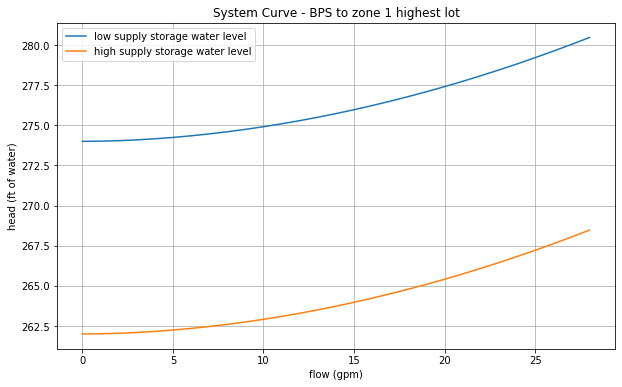

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(sys_x, sys_y_low, label='low supply storage water level')
plt.plot(sys_x, sys_y_high, label='high supply storage water level')
plt.title('System Curve - BPS to zone 1 highest lot')
plt.xlabel('flow (gpm)')
plt.ylabel('head (ft of water)')
plt.legend()
plt.grid()

In [10]:
# Booster Pump Specifications
bstr_pmp = Pump() # instantiate booster pump
bstr_pmp.available_pumps()

(1, 'Goulds', '3657 1.5x2 -6: 3SS', 110, 105)
(2, 'Goulds', '3642-1x1_25-3500', 20, 30)
(3, 'Grundfos', 'CM10-2-A-S-G-V-AQQV', 60, 110)
(4, 'Goulds', '25GS50', 25, 520)
(5, 'Goulds', '35GS50', 35, 420)
(6, 'Goulds', '75GS100CB', 75, 395)
(7, 'Goulds', '85GS100', 80, 390)
(8, 'Grundfos', 'CMBE 5-62', 20, 197)
(9, 'Goulds', '85GS75', 80, 305)
(10, 'Grundfos', '85S100-9', 80, 375)
(11, 'Goulds', '5SV-7', 30, 195)
(12, 'Goulds', '5HM06', 33, 152)
(13, 'Grundfos', 'CMBE 1-75', 11, 160)
(14, 'Goulds', '5SV-10', 30, 275)


In [11]:
# pump data to load into database (only needed once)
''' 
new_pump_data = {'model' : '5SV-10',
                 'mfg' : 'Goulds',
                 'flow' : [0, 5, 10, 15, 20, 25, 30, 35, 40, 43],
                 'head' : [345, 344, 342, 335, 324, 300, 275, 246, 210, 175],
                 'eff' : [0, 0, 0.46, 0.57, 0.64, 0.67, 0.70, 0.68, 0.63, 0.58],
                 'bep' : [30, 275],
                 'rpm' : 3500,
                 'impeller' : None
                }
bstr_pmp.add_pump(**new_pump_data)
'''
bstr_pmp.load_pump('Goulds', '5SV-10')

Pump Model exists in the database, check below for specific parameters:
(14, 'Goulds', '5SV-10', 43, 0, 30, 345, 175, 275, 0.7, 3500, None)


In [14]:
bstr_pmp.model

'5SV-10'

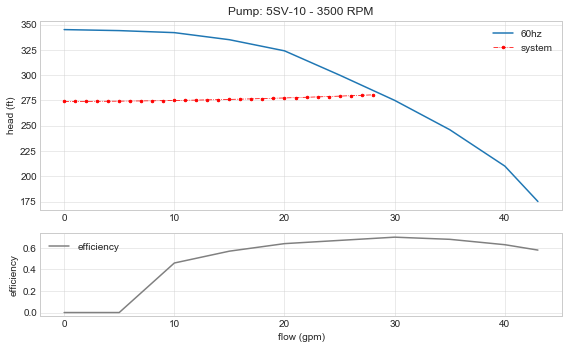

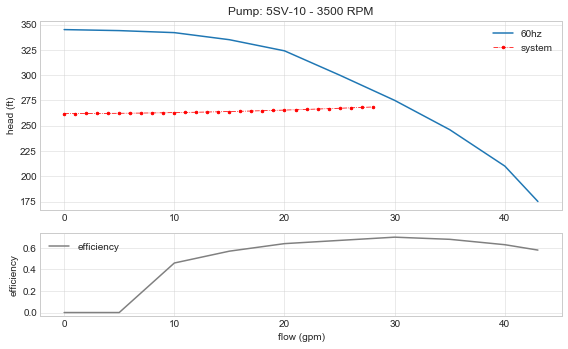

In [20]:
# low water level
bstr_pmp.plot_curve(sys_x, sys_y_low, eff=True, vfd=False)
# high water level
bstr_pmp.plot_curve(sys_x, sys_y_high, eff=True, vfd=False)